In [1]:
import geopandas as gpd
import pandas as pd
import osmnx as ox
import matplotlib.pyplot as plt
import folium
import numpy as np
from tqdm.notebook import tqdm
from shapely.geometry import Polygon
%matplotlib inline

In [9]:
place = ['Montreal']
region_name = '+'.join(place)
ex = ox.graph_from_place(place, network_type = 'bike')
pot = ox.graph_from_place(place, network_type = 'drive')

In [10]:
Gd_proj = ox.project_graph(pot)
pot_clean = ox.consolidate_intersections(Gd_proj, rebuild_graph=True, tolerance=10, dead_ends=False)
nodes_d, edges_d = ox.graph_to_gdfs(pot_clean)
edges_d = edges_d[edges_d.highway.isin(['residential','primary','secondary','tertiary','tertiary_link'])]
pot_clean = ox.graph_from_gdfs(nodes_d,edges_d)

In [11]:
Gb_proj = ox.project_graph(ex)
ex_clean = ox.consolidate_intersections(Gb_proj, rebuild_graph=True, tolerance=15, dead_ends=False)
nodes_b, edges_b = ox.graph_to_gdfs(ex_clean)
edges_b = edges_b[edges_b.highway == 'cycleway']
ex_clean = ox.graph_from_gdfs(nodes_b,edges_b)

In [13]:
ox.io.save_graphml(ex_clean,'Data/Reseaux/EX_'+region_name+'.graphml')
ox.io.save_graphml(pot_clean,'Data/Reseaux/POT_'+region_name+'.graphml')

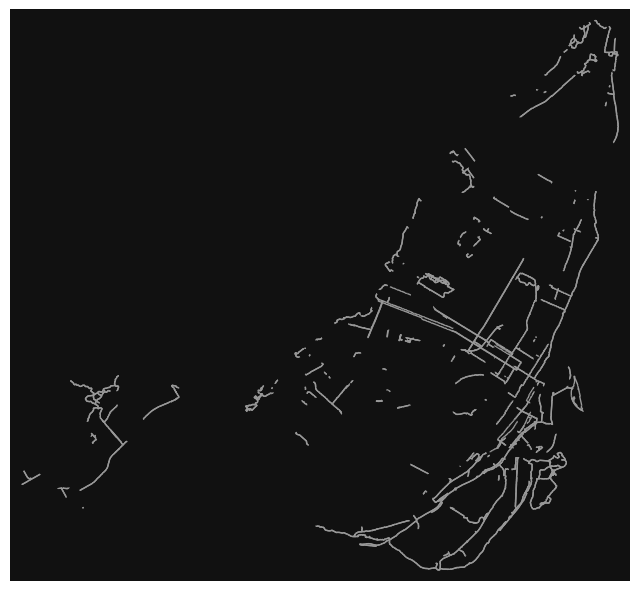

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [17]:
ox.plot_graph(ex_clean, node_size = 0)